In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv("C:\\Users\\user\\Desktop\\MAIN\\ELEVATE LABS\\PROJECT 2\\Airbnb_Open_Data.csv", low_memory=False)

# Check column names
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood', 'lat', 'long', 'country', 'instant_bookable',
       'cancellation_policy', 'room type', 'Construction year', 'price',
       'service fee', 'number of reviews', 'review rate number',
       'availability 365'],
      dtype='object')

In [27]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood,lat,long,country,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,number of reviews,review rate number,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Kensington,40.64749,-73.97237,United States,False,strict,Private room,2020.0,966.0,$193,9.0,4.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Midtown,40.75362,-73.98377,United States,False,moderate,Entire home/apt,2007.0,142.0,$28,45.0,4.0,228.0
2,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,East Harlem,40.79851,-73.94399,United States,False,moderate,Entire home/apt,2009.0,204.0,$41,9.0,3.0,289.0
3,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Murray Hill,40.74767,-73.97500,United States,True,flexible,Entire home/apt,2013.0,577.0,$115,74.0,3.0,374.0
4,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Bedford-Stuyvesant,40.68688,-73.95596,United States,False,moderate,Private room,2009.0,1060.0,$212,49.0,5.0,219.0


In [28]:


# Check for missing values
#print(df.isnull().sum())

In [29]:
# Drop unnecessary columns
#df = df.drop(columns=["license", "house_rules", "calculated host listings count", "country code","reviews per month","last review"])
#df = df.drop(columns=["neighbourhood group","minimum nights"])



In [30]:
df.shape

(100123, 18)

In [31]:

# Remove duplicates
df.drop_duplicates(inplace=True)

In [32]:
df.shape

(100123, 18)

In [33]:

# Drop records with missing 'NAME' or 'host name'
df = df.dropna(subset=[
    'NAME', 'host name', 'cancellation_policy', 'host_identity_verified',
    'neighbourhood', 'lat', 'long', 'country', 'Construction year', 'service fee','instant_bookable'
])


In [34]:
df['price'] = pd.to_numeric(df['price'].replace('[\$,]', '', regex=True))


<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\user\AppData\Local\Temp\ipykernel_20036\3150051020.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = pd.to_numeric(df['price'].replace('[\$,]', '', regex=True))


In [35]:
df['price'] = df['price'].fillna(df['price'].mean())
df['number of reviews'] = df['number of reviews'].fillna(df['number of reviews'].mean())
df['review rate number'] = df['review rate number'].fillna(df['review rate number'].mean())
df['availability 365'] = df['availability 365'].fillna(df['availability 365'].mean())


In [36]:
df.isnull().sum()

id                        0
NAME                      0
host id                   0
host_identity_verified    0
host name                 0
neighbourhood             0
lat                       0
long                      0
country                   0
instant_bookable          0
cancellation_policy       0
room type                 0
Construction year         0
price                     0
service fee               0
number of reviews         0
review rate number        0
availability 365          0
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100123 entries, 0 to 100122
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      100123 non-null  int64  
 1   NAME                    100123 non-null  object 
 2   host id                 100123 non-null  int64  
 3   host_identity_verified  100123 non-null  object 
 4   host name               100123 non-null  object 
 5   neighbourhood           100123 non-null  object 
 6   lat                     100123 non-null  float64
 7   long                    100123 non-null  float64
 8   country                 100123 non-null  object 
 9   instant_bookable        100123 non-null  bool   
 10  cancellation_policy     100123 non-null  object 
 11  room type               100123 non-null  object 
 12  Construction year       100123 non-null  float64
 13  price                   100123 non-null  float64
 14  service fee         

In [38]:

# Descriptive Statistics
df.describe()

,id,host id,lat,long,Construction year,price,number of reviews,review rate number,availability 365
count,1.001230e+05,1.001230e+05,100123.000000,100123.000000,100123.000000,100123.000000,100123.000000,100123.000000,100123.000000
mean,2.922877e+07,4.926070e+10,40.728087,-73.949616,2012.490537,625.379611,27.400672,3.278237,141.099302
std,1.622737e+07,2.854583e+10,0.055834,0.049525,5.764368,331.400425,49.396815,1.283571,135.162279
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,50.000000,0.000000,1.000000,-10.000000
25%,1.512668e+07,2.456215e+10,40.688750,-73.982570,2007.000000,340.000000,1.000000,2.000000,3.000000
50%,2.919515e+07,4.912394e+10,40.722300,-73.954430,2012.000000,625.379611,7.000000,3.000000,98.000000
75%,4.328018e+07,7.400854e+10,40.762750,-73.932280,2017.000000,913.000000,30.000000,4.000000,268.000000
max,5.735803e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,1024.000000,5.000000,3677.000000


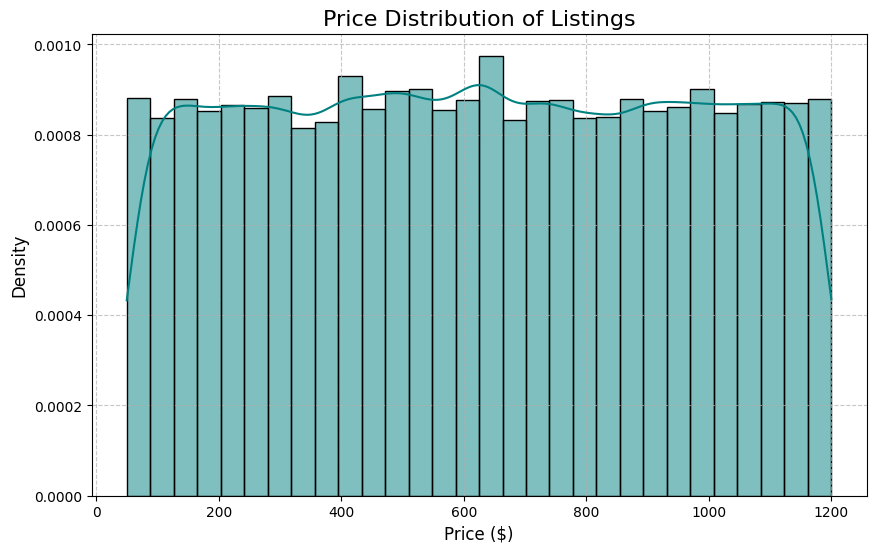

In [39]:

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True, color='teal', stat='density')
plt.title('Price Distribution of Listings', fontsize=16)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig("price_distribution.png", dpi=300, bbox_inches='tight')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_20036\1976873443.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='price', y='number of reviews', data=df, palette='coolwarm', alpha=0.7, edgecolor='black')


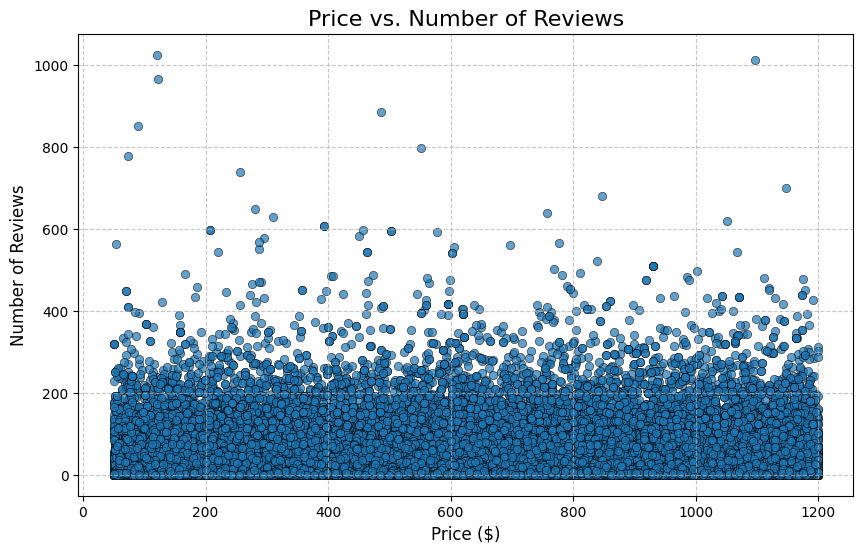

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='number of reviews', data=df, palette='coolwarm', alpha=0.7, edgecolor='black')
plt.title('Price vs. Number of Reviews', fontsize=16)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig("price_vs_reviews.png", dpi=300, bbox_inches='tight')
plt.show()



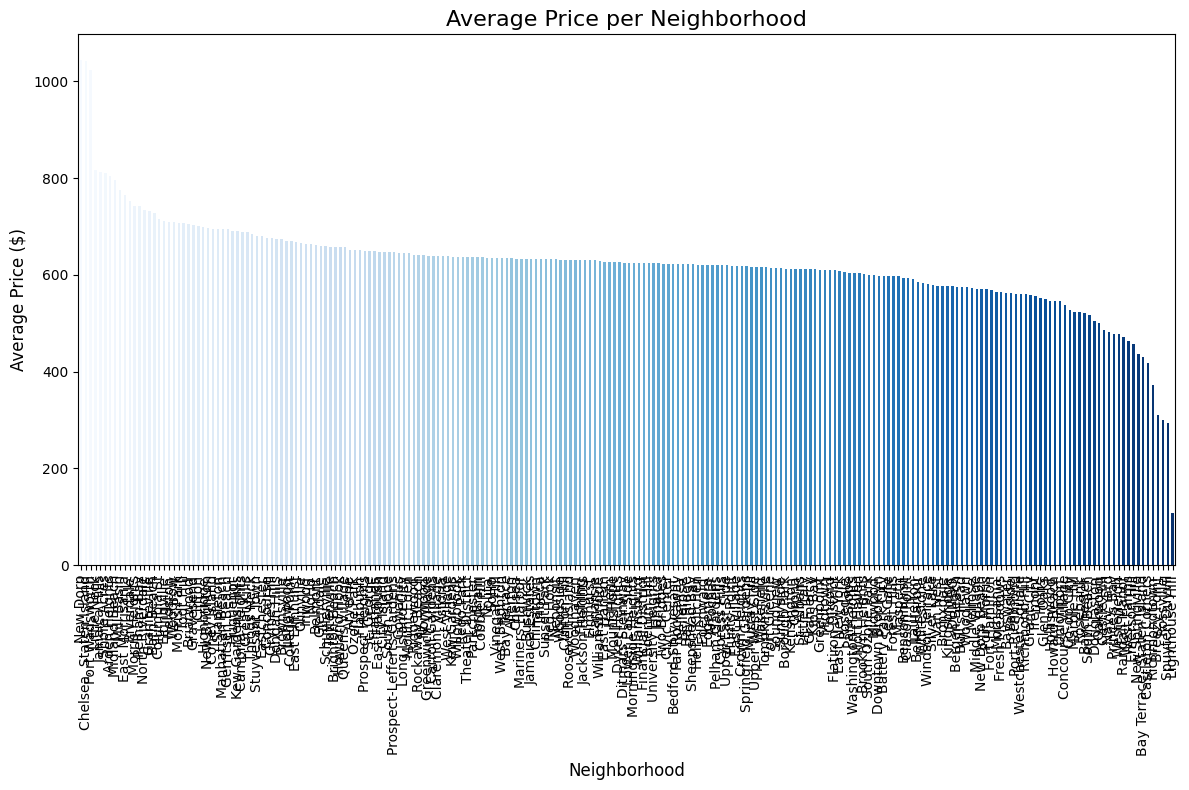

In [41]:
plt.figure(figsize=(12, 8))
avg_price = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)
avg_price.plot(kind='bar', color=sns.color_palette('Blues', n_colors=len(avg_price)))
plt.title('Average Price per Neighborhood', fontsize=16)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("average_price_per_neighbourhood.png", dpi=300, bbox_inches='tight')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_20036\426029597.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cancellation_policy', data=df, palette='viridis')


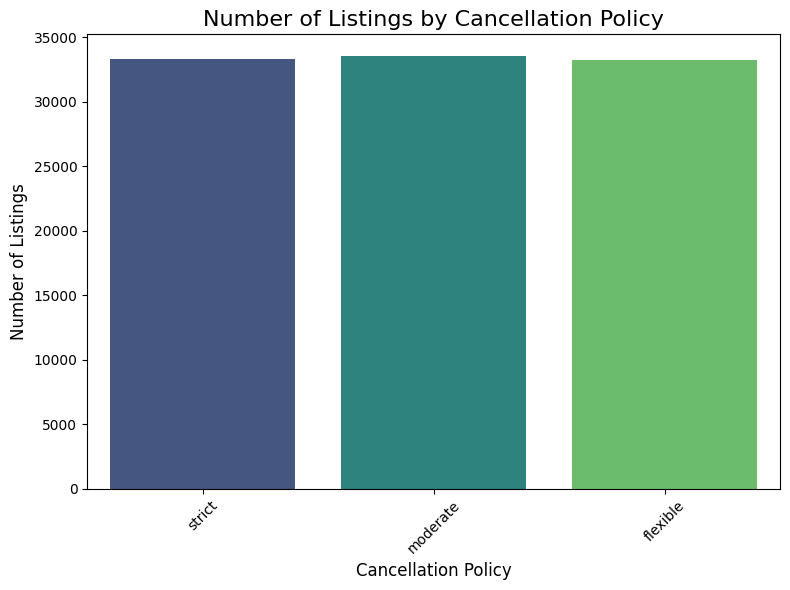

In [42]:
plt.figure(figsize=(8, 6))
sns.countplot(x='cancellation_policy', data=df, palette='viridis')
plt.title('Number of Listings by Cancellation Policy', fontsize=16)
plt.xlabel('Cancellation Policy', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("listings_by_cancellation_policy.png", dpi=300, bbox_inches='tight')
plt.show()


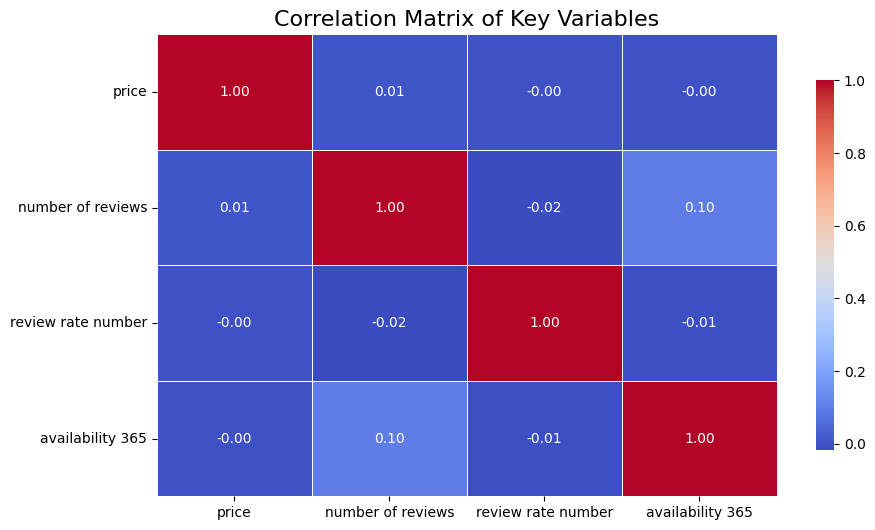

In [43]:
plt.figure(figsize=(10, 6))
correlation_matrix = df[['price', 'number of reviews', 'review rate number', 'availability 365']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of Key Variables', fontsize=16)
plt.savefig("correlation_matrix.png", dpi=300, bbox_inches='tight')
plt.show()



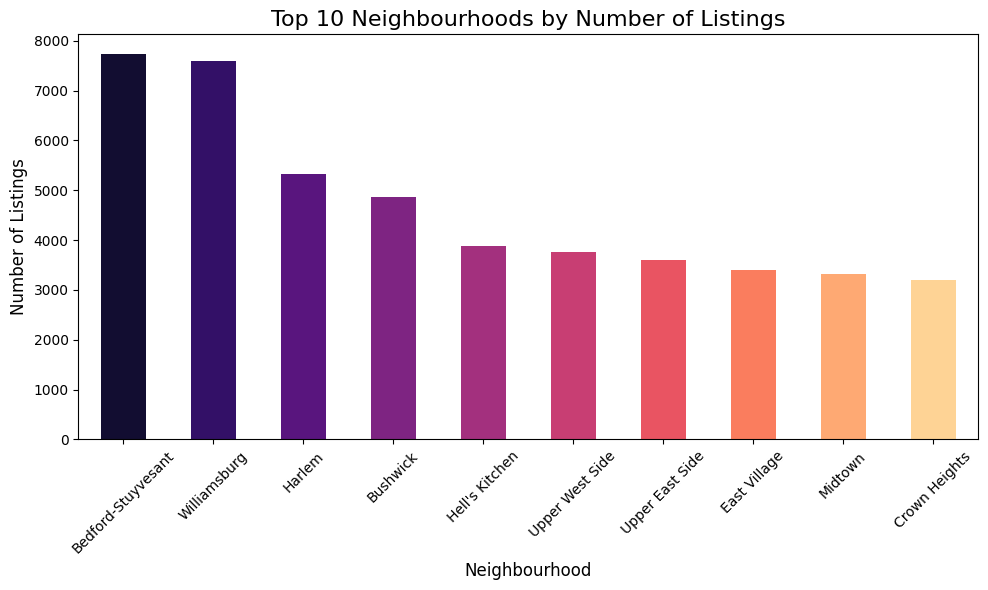

In [44]:
plt.figure(figsize=(10, 6))
top_10_neighbourhoods = df['neighbourhood'].value_counts().head(10)
top_10_neighbourhoods.plot(kind='bar', color=sns.color_palette('magma', n_colors=len(top_10_neighbourhoods)))
plt.title('Top 10 Neighbourhoods by Number of Listings', fontsize=16)
plt.xlabel('Neighbourhood', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("top_10_neighbourhoods.png", dpi=300, bbox_inches='tight')
plt.show()


In [45]:
df.to_csv("C:\\Users\\user\\Desktop\\MAIN\\ELEVATE LABS\\PROJECT 2\\Airbnb_Open_Data.csv", index=False)
